In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 

students = pd.read_csv('stud_math.xls')

In [4]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [105]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 394
Data columns (total 29 columns):
school        308 non-null object
sex           308 non-null object
age           308 non-null int64
address       297 non-null object
famsize       287 non-null object
Pstatus       270 non-null object
Medu          306 non-null float64
Fedu          308 non-null float64
Mjob          291 non-null object
Fjob          282 non-null object
reason        295 non-null object
guardian      281 non-null object
traveltime    287 non-null float64
studytime     301 non-null float64
failures      291 non-null float64
schoolsup     299 non-null object
famsup        277 non-null object
paid          276 non-null object
activities    297 non-null object
nursery       296 non-null object
higher        292 non-null object
internet      281 non-null object
romantic      284 non-null object
famrel        308 non-null float64
freetime      302 non-null float64
goout         302 non-null float64
heal

In [6]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [ ]:
1. School

In [7]:
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


In [ ]:
Большинство учеников из одной школы GP.

In [ ]:
2. Sex

In [8]:
pd.DataFrame(students.sex.value_counts())

,sex
F,208
M,187


In [ ]:
Почти равное распределение учеников по половому признаку.

In [ ]:
3. Age

In [9]:
pd.DataFrame(students.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

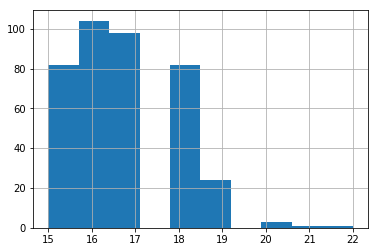

In [13]:
students.age.hist()
students.age.describe()

In [ ]:
Основная масса учеников в возрасте от 15 до 18 лет.

In [ ]:
4. Address

In [110]:
students.address = students.address.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.address.value_counts())

,address
U,232
R,65


In [ ]:
Большинство учеников проживает в городе.

In [ ]:
5. Famsize

In [111]:
students.famsize = students.famsize.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.famsize.value_counts())

,famsize
GT3,197
LE3,90


In [ ]:
Две трети учеников из семей с количеством детей больше 3.

In [ ]:
6. Pstatus

In [113]:
students.Pstatus = students.Pstatus.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.Pstatus.value_counts())

,Pstatus
T,243
A,27


In [ ]:
Подавляющее большинство учеников из семей, в которых родители проживают совместно.

In [ ]:
7. Medu

In [20]:
pd.DataFrame(students.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


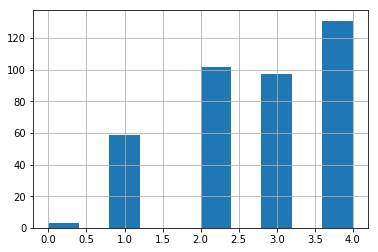

In [22]:
students.Medu.hist()

In [ ]:
Практически все матери учеников получили хоть какое-то образование, причем одна треть с высшим образованием.

In [ ]:
8. Fedu

In [24]:
pd.DataFrame(students.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


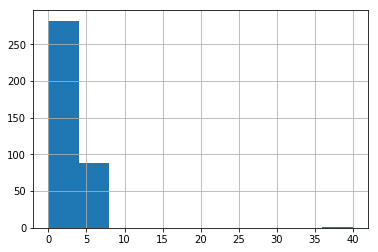

In [23]:
students.Fedu.hist()

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


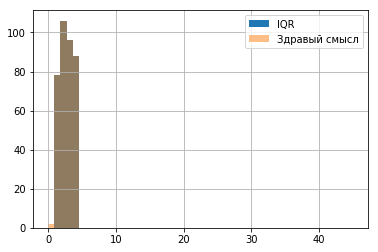

In [71]:
median = students.Fedu.median()
IQR = students.Fedu.quantile(0.75) - students.Fedu.quantile(0.25)
perc25 = students.Fedu.quantile(0.25)
perc75 = students.Fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.Fedu.loc[students.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 50
                                                                                              , range = (0, 45), 
                                                                                             label = 'IQR')
students.Fedu.loc[students.Fedu <= 4].hist(alpha = 0.5, bins = 50, range = (0, 45),
                                                        label = 'Здравый смысл')
plt.legend();

In [79]:
students = students.loc[students.Fedu <= 4]

In [ ]:
Практически все отцы учеников получили хоть какое-то образование, примерно одинаковое количество с 5-9 оконченными классами,
высшим или  средним специальным образованием.

In [ ]:
9. Mjob

In [114]:
students.Mjob = students.Mjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.Mjob.value_counts())

,Mjob
other,101
services,76
at_home,46
teacher,41
health,27


In [ ]:
Наибольшее число матерей занято на государственной службе.

In [ ]:
10. Fjob

In [115]:
students.Fjob = students.Fjob.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.Fjob.value_counts())

,Fjob
other,159
services,77
teacher,23
at_home,12
health,11


In [ ]:
Наибольшее число отцов занято на государственной службе.

In [ ]:
11. Reason 

In [116]:
students.reason = students.reason.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.reason.value_counts())

,reason
course,101
reputation,86
home,77
other,31


In [ ]:
Основной причиной выбора школы стала близость проживания к ней.

In [ ]:
12. Guardian 

In [118]:
students.guardian = students.guardian.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.guardian.value_counts())

,guardian
mother,197
father,65
other,19


In [ ]:
Матери являются опекуном для учеников в большинстве случаев.

13. Traveltime

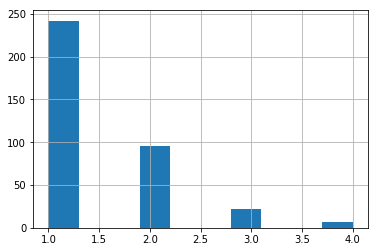

In [29]:
students.traveltime.hist()

In [ ]:
Большинство учеников живет в непосредственной близости от школы.

14. Studytime 

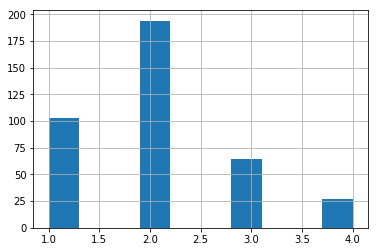

In [31]:
students.studytime.hist()

In [ ]:
Большинство учеников тратит на учёбу помимо школы в неделю 2-5 часов.

In [ ]:
15. failures 

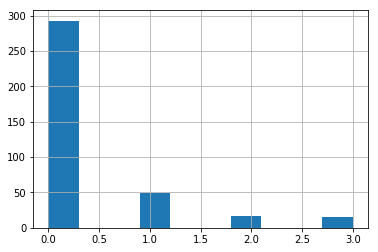

In [32]:
students.failures.hist()

In [ ]:
В основном внеучебных неудач нет у учеников.

In [ ]:
16. schoolsup 

In [119]:
students.schoolsup = students.schoolsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.schoolsup.value_counts())

,schoolsup
no,258
yes,41


In [ ]:
Дополнительная образовательная поддержка отсутствует у подавляющего количества учеников.

In [ ]:
17. famsup 

In [120]:
students.famsup = students.famsup.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.famsup.value_counts())

,famsup
yes,166
no,111


In [ ]:
Семейная образовательная поддержка есть у чуть больше половины учеников.

In [ ]:
18. paid

In [122]:
students.paid = students.paid.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.paid.value_counts())

,paid
no,147
yes,129


In [ ]:
Дополнительные платные занятия по математике есть у почти половины учеников.

In [ ]:
19. activities 

In [124]:
students.activities = students.activities.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.activities.value_counts())

,activities
yes,149
no,148


In [ ]:
Ддополнительные внеучебные занятия приуствуют в жизни половины учеников.

In [ ]:
20. nursery

In [125]:
students.nursery = students.nursery.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.nursery.value_counts())

,nursery
yes,236
no,60


In [ ]:
Большинство учеников посещало детский сад.

In [ ]:
21. higher 

In [127]:
students.higher = students.higher.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.higher.value_counts())

,higher
yes,280
no,12


In [ ]:
Практически все ученики хотят получить высшее образование.

In [ ]:
22. internet 

In [128]:
students.internet = students.internet.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.internet.value_counts())

,internet
yes,236
no,45


In [ ]:
У большинства учеников интернет есть дома.

In [ ]:
23. romantic

In [129]:
students.romantic = students.romantic.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
pd.DataFrame(students.romantic.value_counts())

,romantic
no,193
yes,91


In [ ]:
Две трети учеников не состоят в романтических отношениях.

In [ ]:
24. famrel

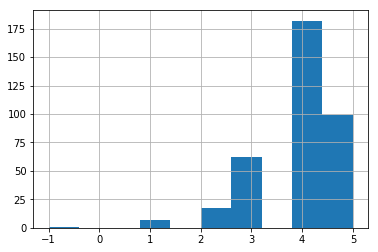

In [41]:
students.famrel.hist()

In [83]:
students = students.loc[students.famrel > 0]

In [ ]:
У большинства учеников хорошие отношения дома.

In [ ]:
25. freetime

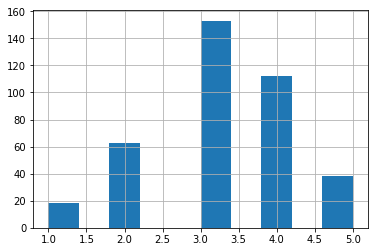

In [42]:
students.freetime.hist()

In [ ]:
Свобное время после школы у большинства учеников есть.

In [ ]:
26. goout 

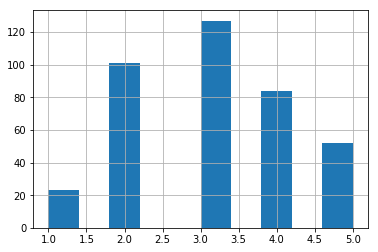

In [43]:
students.goout.hist()

In [ ]:
С друзьми ученики проводят по-разному время.

In [ ]:
27. health

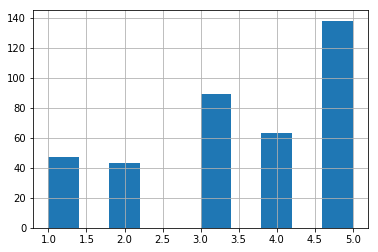

In [44]:
students.health.hist()

In [ ]:
В целом состояние здоровья учеников сейчас хорошее.

In [ ]:
28. absences

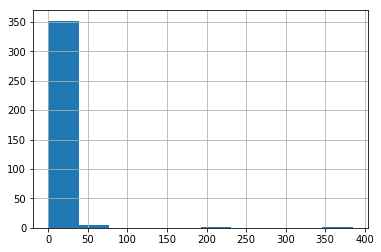

In [81]:
students.absences.hist()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


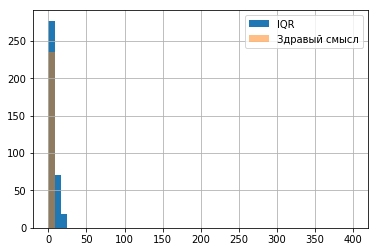

In [73]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 50
                                                                                              , range = (0, 400), 
                                                                                             label = 'IQR')
students.absences.loc[students.absences <= 4].hist(alpha = 0.5, bins = 50, range = (0, 400),
                                                        label = 'Здравый смысл')
plt.legend();

In [ ]:
Большинство учеников пропустило до 8 занятий в год.

In [ ]:
29. score 

count    339.000000
mean      52.477876
std       22.556214
min        0.000000
25%       42.500000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

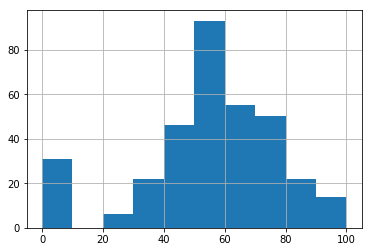

In [84]:
students.score.hist()
students.score.describe()

25-й перцентиль: 42.5, 75-й перцентиль: 70.0, IQR: 27.5,  Границы выбросов: [1.25, 111.25].


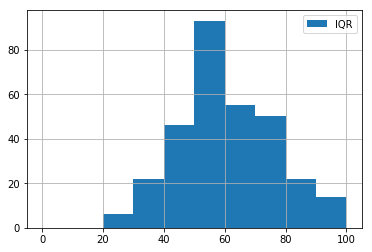

In [85]:
median = students.score.median()
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.score.loc[students.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 100), 
                                                                                             label = 'IQR')
plt.legend();

In [140]:
pd.DataFrame(students.score.value_counts())

,score
50.0,51
55.0,42
65.0,28
60.0,27
75.0,27
40.0,26
70.0,23
45.0,20
80.0,16
30.0,14


In [146]:
students = students.loc[students.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [ ]:
Баллы по госэкзамену по математике распределены нормально. Большинство отметок лежит в пределах от 42.5 до 70 баллов. 
Существуют выбросы с отметкой 0, что свидетельствует о возможном аннулировании результатов в связии списыванием или 
досрочным завершением экзамена в связи с нарушением.

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


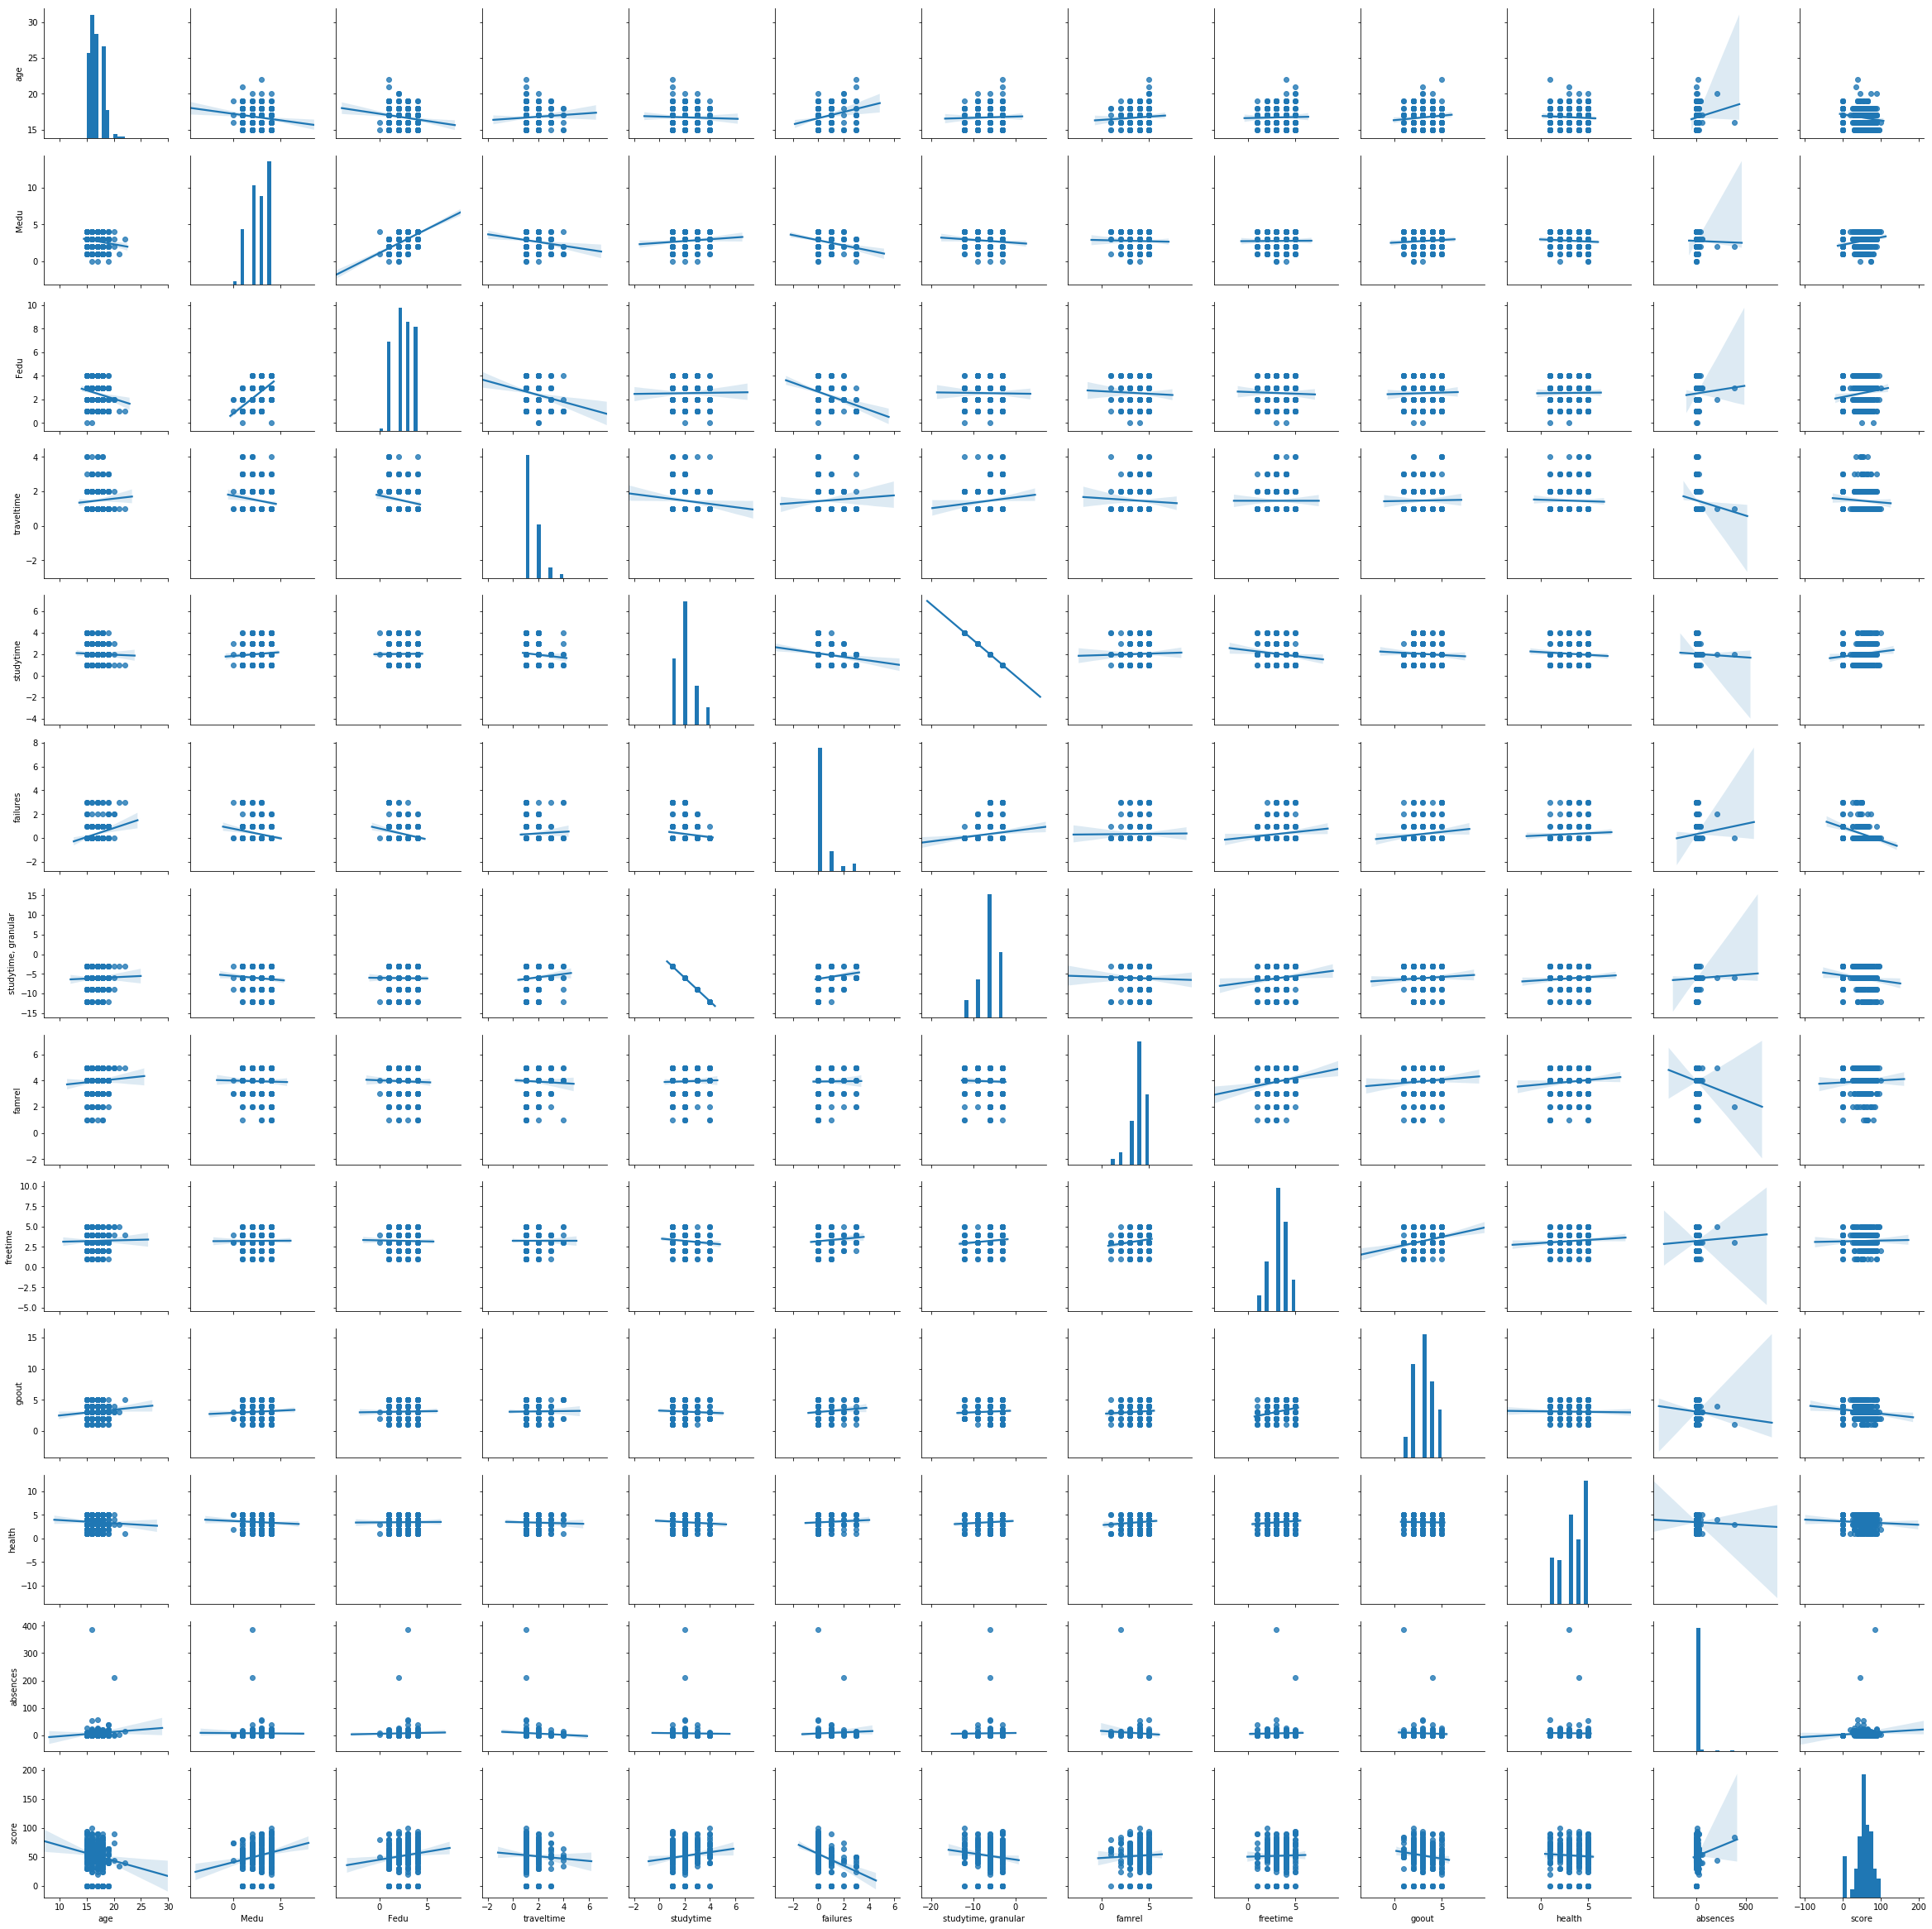

In [87]:
sns.pairplot(students, kind = 'reg')

In [147]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.120544,-0.132904,0.081953,-0.029029,0.268951,0.067594,-0.013682,0.091383,-0.054718,0.099307,-0.135764
Medu,-0.120544,1.000000,0.623277,-0.153984,0.081203,-0.193629,-0.015481,0.006043,0.093004,-0.064927,-0.026699,0.180558
Fedu,-0.132904,0.623277,1.000000,-0.181685,-0.007760,-0.266626,-0.027716,-0.027693,0.037420,0.006017,0.025709,0.136063
traveltime,0.081953,-0.153984,-0.181685,1.000000,-0.119623,0.091287,-0.054459,0.005918,0.023772,-0.000081,-0.065941,-0.081853
studytime,-0.029029,0.081203,-0.007760,-0.119623,1.000000,-0.138870,0.037804,-0.123678,-0.047060,-0.100978,-0.021730,0.149390
failures,0.268951,-0.193629,-0.266626,0.091287,-0.138870,1.000000,0.035149,0.136043,0.111910,0.055280,0.089002,-0.272112
famrel,0.067594,-0.015481,-0.027716,-0.054459,0.037804,0.035149,1.000000,0.147663,0.047466,0.125532,-0.087857,0.020343
freetime,-0.013682,0.006043,-0.027693,0.005918,-0.123678,0.136043,0.147663,1.000000,0.273381,0.124335,0.027808,-0.009284
goout,0.091383,0.093004,0.037420,0.023772,-0.047060,0.111910,0.047466,0.273381,1.000000,-0.017961,-0.052076,-0.160280
health,-0.054718,-0.064927,0.006017,-0.000081,-0.100978,0.055280,0.125532,0.124335,-0.017961,1.000000,-0.021021,-0.056890


In [ ]:
Среди данных параметров нет явно выраженных параметров, у которых сильная связь с результатами по госэкзамену. Все 
корреляционные связи слабые. Среди них выделяется 6 со значениями силы связи более 0.10. Отрицательные связи результата
экзамена с возрастом учеников (с возрастом оценки хуже становятся, возможно сказывается наличие второгодников), количеством
внеучебных неудах (проблемы за пределами школы мешают сфокусироваться на учебе) и со временем с друзьями (чем больше проводят 
ученики времени с друзьями, тем выше риск получения низкой оценки). Положительные связи присутствуют с образованием родителей 
(чем выше степень образования родителей, тем лучше результат учениов, возможно родители помогают своим детям с учебой)  и
со временем на учёбу помимо школы (внеклассные занятия положительно влияют на оценку).

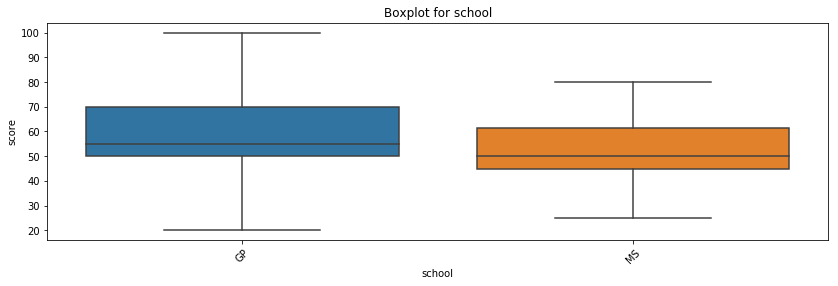

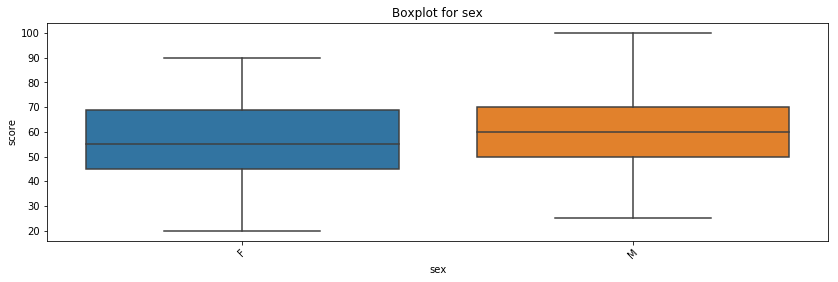

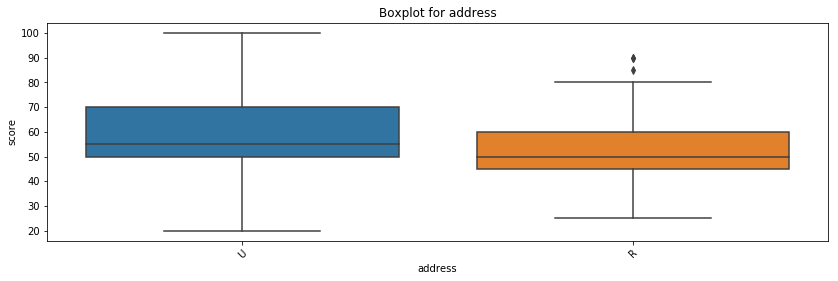

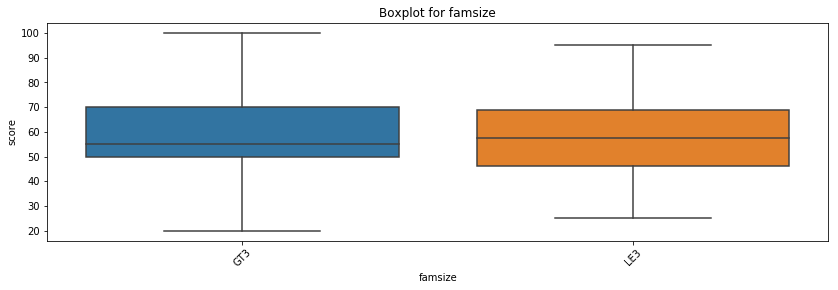

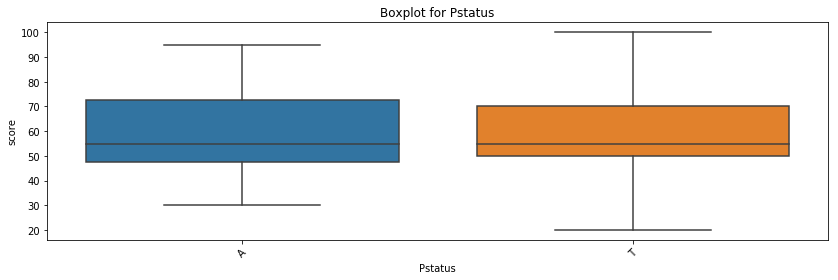

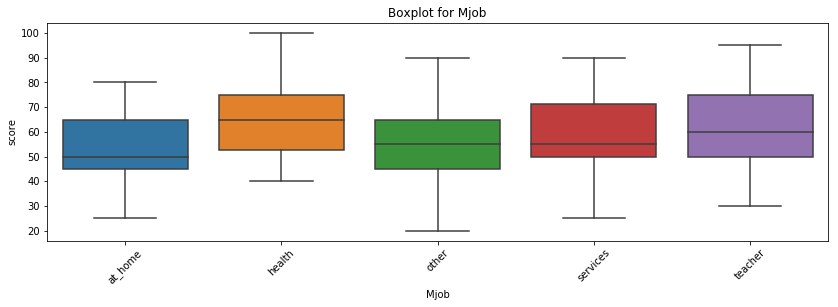

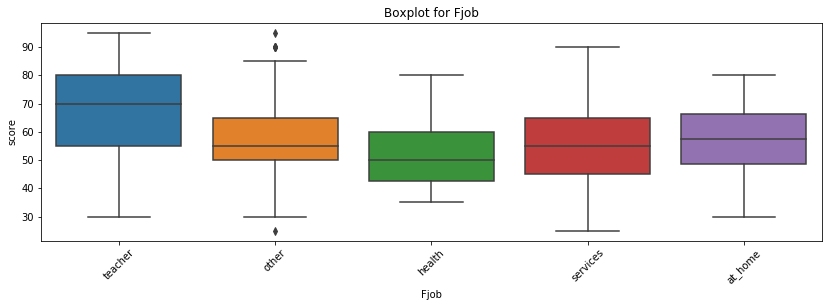

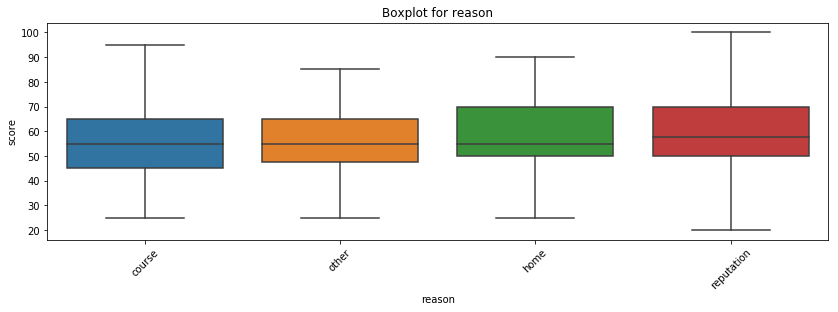

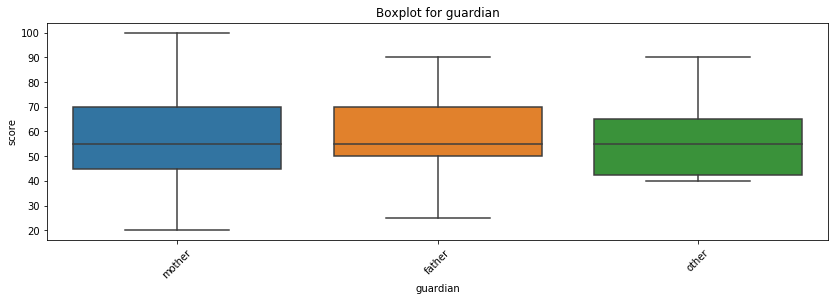

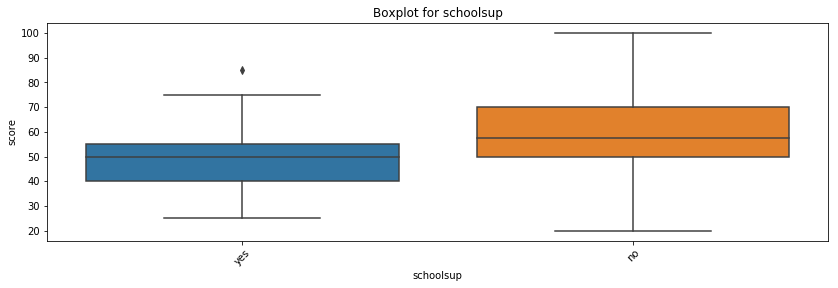

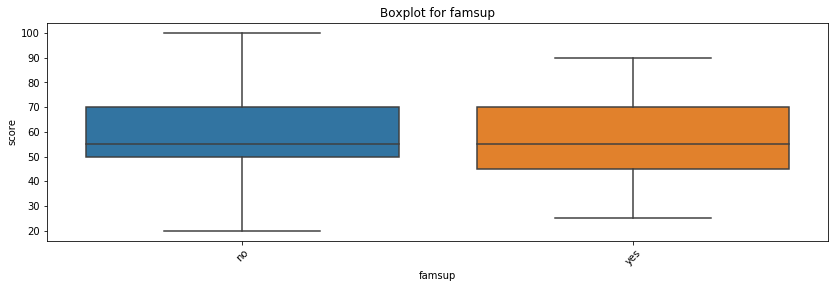

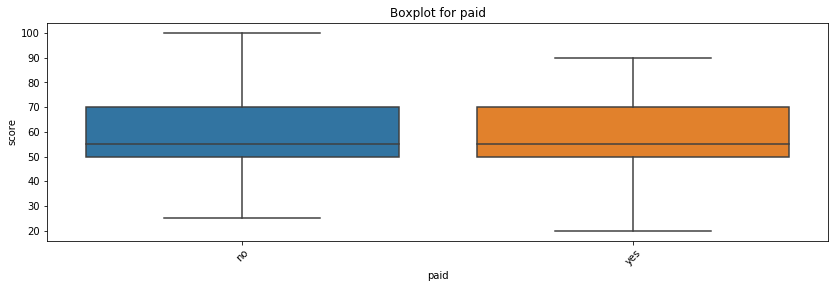

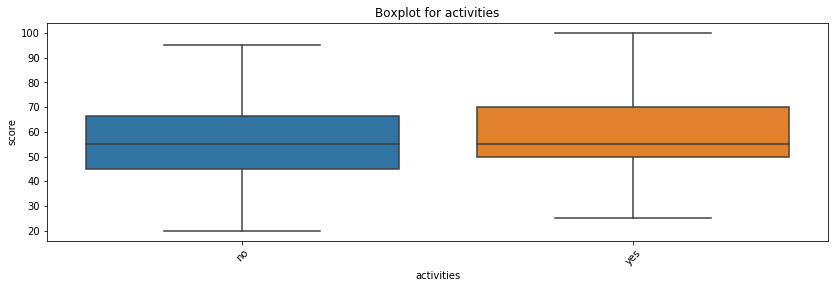

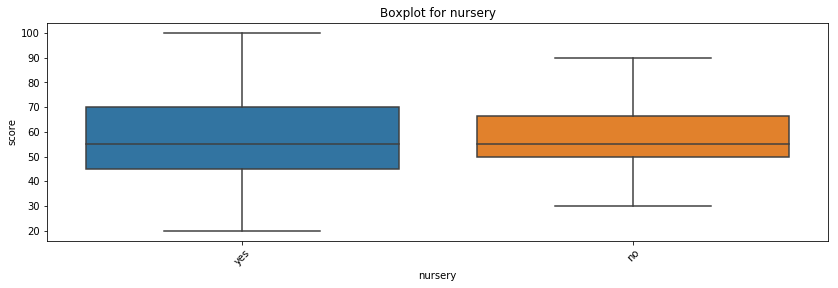

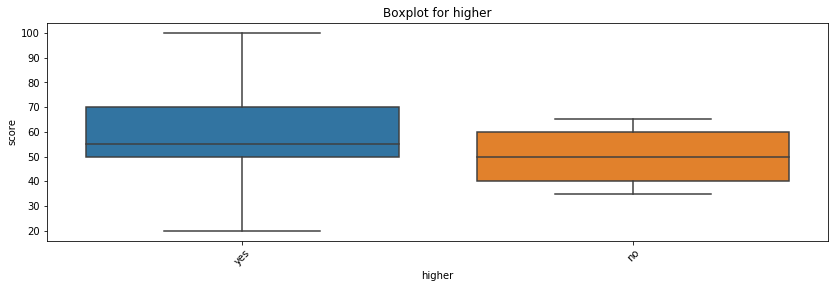

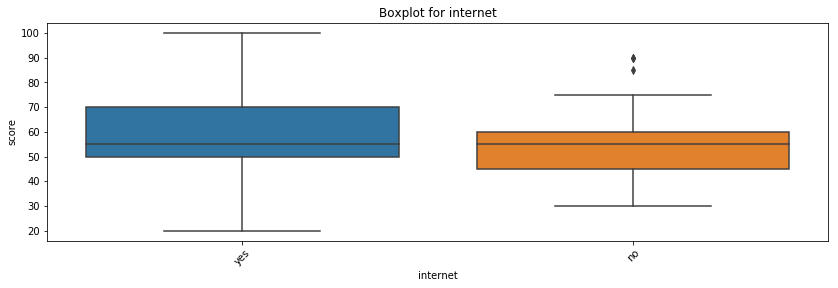

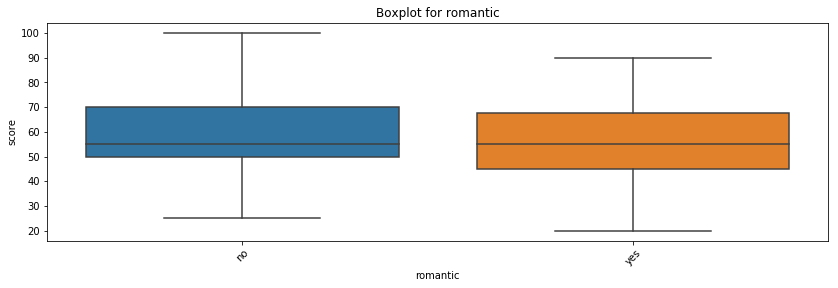

In [148]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [149]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


In [ ]:
Серьёзно отличаются четыре параметра: тип адреса ученика, профессия матери и отца и дополнительная образовательная поддержка.

In [150]:
students_for_model = students.loc[:, ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'goout', 'address', 'Mjob', 'Fjob', 'schoolsup']]
students_for_model.head()

,age,Medu,Fedu,studytime,failures,goout,address,Mjob,Fjob,schoolsup
0,18,4.0,4.0,2.0,0.0,4.0,U,at_home,teacher,yes
1,17,1.0,1.0,2.0,0.0,3.0,U,at_home,other,no
2,15,1.0,1.0,2.0,3.0,2.0,U,at_home,other,yes
3,15,4.0,2.0,3.0,0.0,2.0,U,health,None,no
4,16,3.0,3.0,2.0,0.0,2.0,U,other,other,no


In [ ]:
Выводы:
    1. В данных достаточно мало пустых значений.
    2. Выбросы найдены только в столбцах с уровнем образования отцов и количеством пропущенных занятий, а также в столбце с
    оценками по госэкзамену, что позволяет сделать вывод о том, что данные достаточно чистые. В первом случае скорее всего 
    опечатка, а в остальных возможны естественные причины (отчисление, аннулирование результатов).
    3. Корреляции позволяют сделать вывод о том, что ученики из семей с высокообразованными родителями, проживающие в городе, 
    имеющие возможность на дополнительную образовательную поддержку и время на внеклассную учебу с большей вероятностью получат
    высокие оценки на госэкзамене, чем ученики из сельской местности с малообразованными родителями и с отсутствием времени
    на внешкольные занятия.
    4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, Medu, Fedu, 
    studytime, failures, goout, address, Mjob, Fjob, schoolsup.